In [31]:
# set module
import pandas as pd


from google.colab import drive
drive.mount('/content/drive/')


#경로 설정
import os

new_dir = "/content/drive/MyDrive/기상청/데이터/지면온도"
os.chdir(new_dir)  # 현재 작업 디렉토리 변경
current_dir = os.getcwd()
print("현재 작업 디렉토리:", current_dir)



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
현재 작업 디렉토리: /content/drive/MyDrive/기상청/데이터/지면온도


In [32]:
%pip install tensorflow keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
#Library Imports
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error

####### 딥러닝 라이브러리 ##########
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape, GRU, RNN

tf.keras.backend.set_floatx('float64')


In [34]:
# 데이터 읽어오기
data_train = pd.read_csv("./surface_tp_train.csv")
data_test= pd.read_csv("./surface_tp_test.csv")

In [35]:
print(data_train.shape, data_test.shape)

(438240, 16) (26280, 14)


# data preprocessing

In [36]:
## column 명 추출

data_train.drop('Unnamed: 0', axis = 1, inplace = True)
df_train = data_train.drop('...1', axis = 1)
df_test = data_test.drop('Unnamed: 0', axis = 1)

In [37]:
df_train

,surface_tp_train.stn,surface_tp_train.year,surface_tp_train.mmddhh,surface_tp_train.ta,surface_tp_train.td,surface_tp_train.hm,surface_tp_train.ws,surface_tp_train.rn,surface_tp_train.re,surface_tp_train.ww,surface_tp_train.ts,surface_tp_train.si,surface_tp_train.ss,surface_tp_train.sn
0,1,A,20100,-9.9,-10.7,93.9,0.6,0.0,0,H,-1.3,-99.9,-99.9,-99.9
1,1,A,20101,-10.8,-11.6,93.8,0.6,0.0,0,H,-1.5,-99.9,-99.9,-99.9
2,1,A,20102,-11.4,-12.1,94.6,0.7,0.0,0,H,-1.7,-99.9,-99.9,-99.9
3,1,A,20103,-11.6,-12.5,93.4,0.6,0.0,0,H,-1.8,-99.9,-99.9,-99.9
4,1,A,20104,-11.8,-12.7,93.0,0.6,0.0,0,H,-2.0,-99.9,-99.9,-99.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438235,10,F,13119,5.7,-7.2,39.2,3.9,0.0,0,C,3.6,-99.9,-99.9,-99.9
438236,10,F,13120,5.2,-8.0,38.1,4.9,0.0,0,C,2.7,-99.9,-99.9,-99.9
438237,10,F,13121,4.6,-7.9,39.8,6.6,0.0,0,C,2.2,-99.9,-99.9,-99.9
438238,10,F,13122,3.6,-6.6,47.4,7.1,0.0,0,C,1.6,-99.9,-99.9,-99.9


In [38]:
df_test

,surface_tp_test.stn,surface_tp_test.year,surface_tp_test.mmddhh,surface_tp_test.ta,surface_tp_test.td,surface_tp_test.hm,surface_tp_test.ws,surface_tp_test.rn,surface_tp_test.re,surface_tp_test.ww,surface_tp_test.si,surface_tp_test.ss,surface_tp_test.sn
0,a,F,20100,0.6,-2.0,82.5,2.7,0.0,0,G,-99.9,-99.9,3.1
1,a,F,20101,0.0,-5.2,68.3,3.2,0.0,0,R,-99.9,-99.9,3.1
2,a,F,20102,-0.3,-6.4,63.7,2.7,0.0,0,C,-99.9,-99.9,3.1
3,a,F,20103,-1.0,-4.5,77.2,2.1,0.2,7,R,-99.9,-99.9,4.1
4,a,F,20104,-1.4,-3.1,88.3,2.9,0.6,3,R,-99.9,-99.9,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,c,G,13119,7.1,-1.9,53.0,5.7,0.0,0,C,-99.9,-99.9,-99.9
26276,c,G,13120,6.7,-0.5,60.1,4.7,0.0,0,C,-99.9,-99.9,-99.9
26277,c,G,13121,6.2,-0.1,63.9,3.7,0.0,0,C,-99.9,-99.9,-99.9
26278,c,G,13122,6.5,0.8,67.1,4.8,0.0,0,C,-99.9,-99.9,-99.9


In [39]:
print(df_train.shape)
print(df_test.shape)

(438240, 14)
(26280, 13)


In [40]:
# 각 열별로 결측값 개수 세기
null_counts = df_train.isna().sum()
print(null_counts)

surface_tp_train.stn       0
surface_tp_train.year      0
surface_tp_train.mmddhh    0
surface_tp_train.ta        0
surface_tp_train.td        0
surface_tp_train.hm        0
surface_tp_train.ws        0
surface_tp_train.rn        0
surface_tp_train.re        0
surface_tp_train.ww        0
surface_tp_train.ts        0
surface_tp_train.si        0
surface_tp_train.ss        0
surface_tp_train.sn        0
dtype: int64


In [41]:
# # 결측값 지정
# df_train = df_train.replace([-99, -99.9, -999], np.nan)
# df_test = df_test.replace([-99, -99.9, -999], np.nan)

In [42]:
null_counts = df_train.isna().sum()
print(null_counts)

surface_tp_train.stn       0
surface_tp_train.year      0
surface_tp_train.mmddhh    0
surface_tp_train.ta        0
surface_tp_train.td        0
surface_tp_train.hm        0
surface_tp_train.ws        0
surface_tp_train.rn        0
surface_tp_train.re        0
surface_tp_train.ww        0
surface_tp_train.ts        0
surface_tp_train.si        0
surface_tp_train.ss        0
surface_tp_train.sn        0
dtype: int64


In [43]:
null_counts_test = df_test.isna().sum()
print(null_counts_test)

surface_tp_test.stn       0
surface_tp_test.year      0
surface_tp_test.mmddhh    0
surface_tp_test.ta        0
surface_tp_test.td        0
surface_tp_test.hm        0
surface_tp_test.ws        0
surface_tp_test.rn        0
surface_tp_test.re        0
surface_tp_test.ww        0
surface_tp_test.si        0
surface_tp_test.ss        0
surface_tp_test.sn        0
dtype: int64


stn : 지점번호 \\
year : 년도 \
mmddhh : 월/일/ 시간\
ta : 1시간 평균 기온 \
td : 1시간 평균 이슬점 온도

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438240 entries, 0 to 438239
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   surface_tp_train.stn     438240 non-null  int64  
 1   surface_tp_train.year    438240 non-null  object 
 2   surface_tp_train.mmddhh  438240 non-null  int64  
 3   surface_tp_train.ta      438240 non-null  float64
 4   surface_tp_train.td      438240 non-null  float64
 5   surface_tp_train.hm      438240 non-null  float64
 6   surface_tp_train.ws      438240 non-null  float64
 7   surface_tp_train.rn      438240 non-null  float64
 8   surface_tp_train.re      438240 non-null  int64  
 9   surface_tp_train.ww      438240 non-null  object 
 10  surface_tp_train.ts      438240 non-null  float64
 11  surface_tp_train.si      438240 non-null  float64
 12  surface_tp_train.ss      438240 non-null  float64
 13  surface_tp_train.sn      438240 non-null  float64
dtypes: f

In [45]:
df_train.describe()

,surface_tp_train.stn,surface_tp_train.mmddhh,surface_tp_train.ta,surface_tp_train.td,surface_tp_train.hm,surface_tp_train.ws,surface_tp_train.rn,surface_tp_train.re,surface_tp_train.ts,surface_tp_train.si,surface_tp_train.ss,surface_tp_train.sn
count,438240.000000,438240.000000,438240.000000,438240.000000,438240.000000,438240.000000,438240.000000,438240.000000,438240.000000,438240.000000,438240.000000,438240.000000
mean,5.500000,66819.769441,13.648830,6.546744,65.429143,1.982703,-1.539624,2.608285,15.268847,-45.005243,-45.094056,-98.205804
std,2.872285,34506.091290,11.042725,12.627285,22.430588,5.156003,12.996733,13.570768,13.362203,50.307733,50.000381,13.128373
min,1.000000,10100.000000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,-99.000000,-99.900000,-99.900000,-99.900000,-99.900000
25%,3.000000,40202.000000,5.800000,-2.400000,49.200000,1.000000,0.000000,0.000000,4.800000,-99.900000,-99.900000,-99.900000
50%,5.500000,70209.000000,14.700000,7.300000,66.500000,1.800000,0.000000,0.000000,15.500000,0.010000,0.000000,-99.900000
75%,8.000000,100116.000000,22.200000,17.100000,83.900000,3.000000,0.000000,0.000000,24.300000,0.990000,0.700000,-99.900000
max,10.000000,123123.000000,39.400000,29.300000,100.000000,24.600000,623.500000,60.000000,65.700000,4.770000,1.000000,37.400000


# 결측치 처리

step1 na 가장 많은 열 제거 \
step2
1. 결측치 보간
2. 결측치 모두 제거 -------------------------> 이거 하자
3. 결측치 그대로(새로운 범주 취급)

In [57]:
# result_train['hh'] = result_train['surface_tp_train.mmddhh'].astype(int).astype(str).str[-2:]
# result_train['dd'] = result_train['surface_tp_train.mmddhh'].astype(int).astype(str).str[-4:-2]
# result_train['mm'] = result_train['surface_tp_train.mmddhh'].astype(int).astype(str).str[:-4]
# year_mapping = {'A': 2001, 'B': 2002, 'C': 2003, 'D': 2004, 'E': 2005, 'F': 2006}
# result_train['new_year'] = result_train['surface_tp_train.year'].map(year_mapping)
# result_train['mm'] = result_train['mm'].apply(lambda x: x.zfill(2))
# result_train['date'] = pd.to_datetime(result_train['new_year'].astype(str) + result_train['mm'] + result_train['dd'] + result_train['hh'], format='%Y%m%d%H')

def adding_date(data_original, season): # season: all, spring, summer, fall, winter 계절별로 넣기 가능
  data = data_original
  data['hh'] = data['surface_tp_train.mmddhh'].astype(int).astype(str).str[-2:]
  data['dd'] = data['surface_tp_train.mmddhh'].astype(int).astype(str).str[-4:-2]
  data['mm'] = data['surface_tp_train.mmddhh'].astype(int).astype(str).str[:-4]
  year_mapping = {'A': 2001, 'B': 2002, 'C': 2003, 'D': 2004, 'E': 2005, 'F': 2006}
  data['new_year'] = data['surface_tp_train.year'].map(year_mapping)
  data['mm'] = data['mm'].apply(lambda x: x.zfill(2))
  data['date'] = pd.to_datetime(data['new_year'].astype(str) + data['mm'] + data['dd'] + data['hh'], format='%Y%m%d%H')

  spring_month_list = ['02', '03', '04']
  summer_month_list = ['05', '06', '07']
  fall_month_list = ['08', '09', '10']
  winter_month_list = ['11', '12', '01']

  if season == "all":
    pass
  elif season == "spring":
    filtered_data = data[data['mm'].isin(spring_month_list)]
  elif season == "summer":
    filtered_data = data[data['mm'].isin(summer_month_list)]
  elif season == "fall":
    filtered_data = data[data['mm'].isin(fall_month_list)]
  elif season == "winter":
    filtered_data = data[data['mm'].isin(winter_month_list)]
  else:
    raise ValueError("not season value")

  data = filtered_data.drop(["surface_tp_train.year", 'surface_tp_train.mmddhh', 'hh', 'dd', 'mm', 'new_year'], axis = 1)
  # data["datetime"] = pd.to_datetime(data["date"])  # 문자열을 날짜/시간 유형으로 변환
  ## datetime 순으로 index 생성
  data = data.reset_index(drop = True)
  # data.index = data.index.astype(int)

  # top3 na 제거
  data = data.drop(columns=['surface_tp_train.si', 'surface_tp_train.ss', 'surface_tp_train.sn'])

  return data

### 지역 별로 데이터를 쪼개주는 함수

def region_category(data, region_number): # region_number는 자기가 알아서 넣기로

  # 주어진 열을 기준으로 데이터 프레임을 필터링하고 값 종류별로 데이터를 쪼갬
  unique_values = data['surface_tp_train_stn'].unique()  # 주어진 열의 고유한 값들을 추출

  if region_number in unique_values:
    result = data[data['surface_tp_train_stn'] == region_number]  # 주어진 값에 해당하는 데이터만 필터링하여 저장
  else:
    raise ValueError("not in region number")

  return result


def change_columns(data):
  data.columns = data.columns.str.replace(".", "_")


def change_to_categrory(data, columns_name):
  data[columns_name] = data[columns_name].astype(str).astype('category')
  return data

In [47]:
def adding_test_date(data_original, season): # season: all, spring, summer, fall, winter 계절별로 넣기 가능
  data = data_original
  data['hh'] = data['surface_tp_test.mmddhh'].astype(int).astype(str).str[-2:]
  data['dd'] = data['surface_tp_test.mmddhh'].astype(int).astype(str).str[-4:-2]
  data['mm'] = data['surface_tp_test.mmddhh'].astype(int).astype(str).str[:-4]
  year_mapping = {'A': 2001, 'B': 2002, 'C': 2003, 'D': 2004, 'E': 2005, 'F': 2006,'G': 2007 }
  data['new_year'] = data['surface_tp_test.year'].map(year_mapping)
  data['mm'] = data['mm'].apply(lambda x: x.zfill(2))
  data['date'] = pd.to_datetime(data['new_year'].astype(str) + data['mm'] + data['dd'] + data['hh'], format='%Y%m%d%H')

  spring_month_list = ['02', '03', '04']
  summer_month_list = ['05', '06', '07']
  fall_month_list = ['08', '09', '10']
  winter_month_list = ['11', '12', '01']

  if season == "all":
    pass
  elif season == "spring":
    filtered_data = data[data['mm'].isin(spring_month_list)]
  elif season == "summer":
    filtered_data = data[data['mm'].isin(summer_month_list)]
  elif season == "fall":
    filtered_data = data[data['mm'].isin(fall_month_list)]
  elif season == "winter":
    filtered_data = data[data['mm'].isin(winter_month_list)]
  else:
    raise ValueError("not season value")

  data = filtered_data.drop(["surface_tp_test.year", 'surface_tp_test.mmddhh', 'hh', 'dd', 'mm', 'new_year'], axis = 1)
  # data["datetime"] = pd.to_datetime(data["date"])  # 문자열을 날짜/시간 유형으로 변환
  data = data.reset_index(drop = True)
  # data.index = data.index.astype(int)

  # step1 top3 na 제거
  data = data.drop(columns=['surface_tp_test.si', 'surface_tp_test.ss', 'surface_tp_test.sn'])

  return data


# spring

In [48]:
result_train_spring = adding_date(df_train, "spring")
result_train_spring.columns

result_test_spring = adding_test_date(df_test, "spring")
result_test_spring.columns

## column 이름에 . 제거
change_columns(result_train_spring)
change_columns(result_test_spring)

<ipython-input-46-897adbbfaebb>:64: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(".", "_")
<ipython-input-46-897adbbfaebb>:64: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(".", "_")


In [20]:
# step2
# result_train_spring = result_train_spring.dropna()
# result_test_spring = result_test_spring.dropna()

(107040, 10)
(6408, 9)


In [50]:
print(result_train_spring['surface_tp_train_stn'].value_counts())
print(result_test_spring['surface_tp_test_stn'].value_counts())

1     10704
2     10704
3     10704
4     10704
5     10704
6     10704
7     10704
8     10704
9     10704
10    10704
Name: surface_tp_train_stn, dtype: int64
a    2136
b    2136
c    2136
Name: surface_tp_test_stn, dtype: int64


# summer

In [51]:
# summer
result_train_summer = adding_date(df_train, "summer")
result_train_summer.columns

result_test_summer = adding_test_date(df_test, "summer")
result_test_summer.columns

## column 이름에 . 제거
change_columns(result_train_summer)
change_columns(result_test_summer)

# step2
# result_train_summer = result_train_summer.dropna()

<ipython-input-46-897adbbfaebb>:64: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(".", "_")
<ipython-input-46-897adbbfaebb>:64: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(".", "_")


,surface_tp_train_stn,surface_tp_train_ta,surface_tp_train_td,surface_tp_train_hm,surface_tp_train_ws,surface_tp_train_rn,surface_tp_train_re,surface_tp_train_ww,surface_tp_train_ts,date
0,1,17.6,12.0,69.8,0.7,0.0,0,H,17.1,2001-05-01 00:00:00
1,1,15.9,12.3,79.2,0.7,0.0,0,H,16.4,2001-05-01 01:00:00
2,1,15.0,12.3,84.0,0.8,0.0,0,H,15.9,2001-05-01 02:00:00
3,1,15.1,8.2,65.4,1.7,0.0,0,H,15.4,2001-05-01 03:00:00
4,1,16.1,1.6,37.5,2.7,0.0,0,C,14.6,2001-05-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
110395,10,29.4,25.9,81.6,4.6,0.0,0,C,30.6,2005-07-31 19:00:00
110396,10,28.6,26.2,87.3,3.9,0.0,0,C,29.1,2005-07-31 20:00:00
110397,10,28.2,26.1,88.6,3.5,0.0,0,C,28.3,2005-07-31 21:00:00
110398,10,28.0,26.2,90.1,4.5,0.0,0,C,27.9,2005-07-31 22:00:00


# fall

In [52]:
# fall
result_train_fall = adding_date(df_train, "fall")
result_train_fall.columns

result_test_fall = adding_test_date(df_test, "fall")
result_test_fall.columns

## column 이름에 . 제거
change_columns(result_train_fall)
change_columns(result_test_fall)

# step2
# result_train_summer = result_train_summer.dropna()

<ipython-input-46-897adbbfaebb>:64: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(".", "_")
<ipython-input-46-897adbbfaebb>:64: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(".", "_")


,surface_tp_train_stn,surface_tp_train_ta,surface_tp_train_td,surface_tp_train_hm,surface_tp_train_ws,surface_tp_train_rn,surface_tp_train_re,surface_tp_train_ww,surface_tp_train_ts,date
0,1,24.2,24.1,99.6,0.8,0.0,0,C,24.0,2001-08-01 00:00:00
1,1,24.0,24.0,99.6,0.6,0.0,0,H,24.0,2001-08-01 01:00:00
2,1,23.8,23.8,99.9,0.7,0.0,0,H,23.8,2001-08-01 02:00:00
3,1,23.7,23.7,99.8,0.7,0.0,0,C,23.8,2001-08-01 03:00:00
4,1,23.8,23.7,99.6,0.6,0.0,0,H,23.9,2001-08-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
110395,10,17.9,10.9,63.7,1.4,0.0,0,C,15.9,2005-10-31 19:00:00
110396,10,17.1,11.0,67.1,2.3,0.0,0,C,15.0,2005-10-31 20:00:00
110397,10,16.8,11.0,68.9,2.7,0.0,0,C,14.5,2005-10-31 21:00:00
110398,10,16.0,10.4,69.5,2.4,0.0,0,C,14.0,2005-10-31 22:00:00


# winter

In [53]:
# winter
result_train_winter = adding_date(df_train, "winter")
result_train_winter.columns

result_test_winter = adding_test_date(df_test, "winter")
result_test_winter.columns

## column 이름에 . 제거
change_columns(result_train_winter)
change_columns(result_test_winter)

# step2
# result_train_summer = result_train_summer.dropna()

<ipython-input-46-897adbbfaebb>:64: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(".", "_")
<ipython-input-46-897adbbfaebb>:64: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(".", "_")


,surface_tp_train_stn,surface_tp_train_ta,surface_tp_train_td,surface_tp_train_hm,surface_tp_train_ws,surface_tp_train_rn,surface_tp_train_re,surface_tp_train_ww,surface_tp_train_ts,date
0,1,6.8,4.8,87.5,0.2,0.0,0,C,5.9,2001-11-01 00:00:00
1,1,6.6,5.1,90.1,0.4,0.0,0,H,5.7,2001-11-01 01:00:00
2,1,6.6,5.1,90.1,0.3,0.0,0,H,6.0,2001-11-01 02:00:00
3,1,6.4,5.4,93.2,0.3,0.0,0,H,5.5,2001-11-01 03:00:00
4,1,6.3,5.4,94.1,0.3,0.0,0,H,5.7,2001-11-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
110395,10,5.7,-7.2,39.2,3.9,0.0,0,C,3.6,2006-01-31 19:00:00
110396,10,5.2,-8.0,38.1,4.9,0.0,0,C,2.7,2006-01-31 20:00:00
110397,10,4.6,-7.9,39.8,6.6,0.0,0,C,2.2,2006-01-31 21:00:00
110398,10,3.6,-6.6,47.4,7.1,0.0,0,C,1.6,2006-01-31 22:00:00


# 2. lstm

In [65]:
############## 정규화 #################### => 스케일링을 하자
from sklearn.preprocessing import MinMaxScaler

def scale_columns(data):
    scaler = MinMaxScaler()
    scaled_data = data.copy()
    #numeric_columns = scaled_data.select_dtypes(include=['float64', 'int64']).columns
    numeric_columns = ['surface_tp_train_ta',	'surface_tp_train_td',	'surface_tp_train_hm',	'surface_tp_train_ws',	'surface_tp_train_rn',	'surface_tp_train_re',	'surface_tp_train_ts']
    scaled_data[numeric_columns] = scaler.fit_transform(scaled_data[numeric_columns])
    return scaled_data

# 스케일링을 하자
from sklearn.preprocessing import RobustScaler
def robust_scaling(data):
    rbs = RobustScaler()
    numeric_columns = ['surface_tp_train_ta',	'surface_tp_train_td',	'surface_tp_train_hm',	'surface_tp_train_ws',	'surface_tp_train_rn',	'surface_tp_train_re',	'surface_tp_train_ts']
    data[numeric_columns] = rbs.fit_transform(data[numeric_columns])
    return data

In [66]:
# 스케일링/ 범주처리 / datetime을 index로
result_train_spring1 = pd.get_dummies(result_train_spring, columns=['surface_tp_train_ww'], drop_first=True)
result_train_spring1 = robust_scaling(result_train_spring1)
result_train_spring1
# result_train_spring1 = result_train_spring1.reset_index(drop = True).set_index('datetime')
#result_test_spring1 = pd.get_dummies(result_test_spring, columns=['surface_tp_test.ww'], drop_first=True)
#result_test_spring1 = result_test_spring1.reset_index(drop = True).set_index('datetime')

,surface_tp_train_stn,surface_tp_train_ta,surface_tp_train_td,surface_tp_train_hm,surface_tp_train_ws,surface_tp_train_rn,surface_tp_train_re,surface_tp_train_ts,date,surface_tp_train_ww_F,surface_tp_train_ww_G,surface_tp_train_ww_H,surface_tp_train_ww_R,surface_tp_train_ww_S,surface_tp_train_ww_X
0,1,-2.011111,-1.019417,1.062678,-0.652174,0.0,0.0,-0.745902,2001-02-01 00:00:00,0,0,1,0,0,0
1,1,-2.111111,-1.106796,1.059829,-0.652174,0.0,0.0,-0.762295,2001-02-01 01:00:00,0,0,1,0,0,0
2,1,-2.177778,-1.155340,1.082621,-0.608696,0.0,0.0,-0.778689,2001-02-01 02:00:00,0,0,1,0,0,0
3,1,-2.200000,-1.194175,1.048433,-0.652174,0.0,0.0,-0.786885,2001-02-01 03:00:00,0,0,1,0,0,0
4,1,-2.222222,-1.213592,1.037037,-0.652174,0.0,0.0,-0.803279,2001-02-01 04:00:00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107035,10,1.144444,-0.407767,-1.022792,1.217391,0.0,0.0,0.836066,2005-04-30 19:00:00,0,0,0,0,0,0
107036,10,1.044444,-0.456311,-1.008547,1.260870,0.0,0.0,0.688525,2005-04-30 20:00:00,0,0,0,0,0,0
107037,10,0.988889,-0.203883,-0.854701,0.565217,0.0,5.0,0.688525,2005-04-30 21:00:00,0,0,0,1,0,0
107038,10,0.844444,0.242718,-0.461538,0.869565,0.4,49.0,0.483607,2005-04-30 22:00:00,0,0,0,1,0,0


In [100]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split

# 입력 데이터 준비
X = result_train_spring1.drop(['surface_tp_train_stn', 'surface_tp_train_ts', 'date'], axis=1)  # 시계열 데이터의 X 변수들
y = result_train_spring1['surface_tp_train_ts']  # 예측해야 하는 target 값

# 데이터셋을 병렬적으로 처리하기 위해 reshape
X = np.array(X)  # X를 numpy array로 변환
y = np.array(y)  # y를 numpy array로 변환

# X의 shape를 (n_samples, n_timesteps, n_features)로 변환
n_samples, n_features = X.shape[0], X.shape[1]
n_timesteps = int(n_features / 14)  # 각 시점에서의 지점 수 (10개)
X = X.reshape(n_samples, n_timesteps, 14)

# 데이터셋을 train과 validation으로 분할
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2301)

# train_X와 val_X의 shape 확인
print("train_X shape:", train_X.shape)
print("val_X shape:", val_X.shape)


def convert_list_to_numpy(lists):
    numpy_list = []
    for vector in lists:
        a = np.array(vector)
        numpy_list.append(a)
    return numpy_list


def convert_vector_to_tensor(vectors):
    tensor_list = []
      for vector in vectors:
        tensor = torch.from_numpy(vector)
        tensor_list.append(tensor)
    return tensor_list


numpy_train_X = convert_list_to_numpy(train_X)
tensor_train_X = convert_vector_to_tensor(numpy_train_X)
numpy_val_X = convert_list_to_numpy(val_X)
tensor_val_X = convert_vector_to_tensor(numpy_val_X)

numpy_train_Y = convert_list_to_numpy(train_Y)
tensor_train_Y = convert_vector_to_tensor(numpy_train_Y)
numpy_val_Y = convert_list_to_numpy(val_Y)
tensor_val_Y = convert_vector_to_tensor(numpy_val_Y)

In [ ]:
!pip install torchmetrics

In [103]:
# Hyperparameters
input_size = 12  # 입력 변수의 개수
hidden_size =  64 # LSTM의 hidden state 크기
output_size = 24  # 출력 변수의 개수
num_layers = 1  # LSTM 층의 개수
seq_length = 996  # 시계열 길이 (입력 윈도우 크기)
num_epochs = 10  # 학습 반복 횟수
learning_rate = 0.001  # 학습률
num_locations = 10  # 지점 개수


In [113]:
# # LSTM 모델 정의
# class MultiLocationLSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size, num_locations):
#         super(MultiLocationLSTM, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.num_locations = num_locations

#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

#         # 3D 텐서를 2D 텐서로 변환
#         h0 = h0.view(self.num_layers, -1, self.hidden_size)
#         c0 = c0.view(self.num_layers, -1, self.hidden_size)

#         out, _ = self.lstm(x, (h0, c0))
# #         out = self.fc(out[:, -1, :])
#         output = self.dense(output[:, -1, :])
#         output = torch.sigmoid(output)
#         return out


In [114]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from torchmetrics.classification import BinaryF1Score
from torchmetrics.classification import BinaryAccuracy

# LSTM 모델 정의
class MultiLocationLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, num_locations):
        super(MultiLocationLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_locations = num_locations

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # 3D 텐서를 2D 텐서로 변환
        h0 = h0.view(self.num_layers, -1, self.hidden_size)
        c0 = c0.view(self.num_layers, -1, self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        output = self.fc(out[:, -1, :])
        output = torch.sigmoid(output)
        return output


# 입력 데이터 준비
X = result_train_spring1.drop(['surface_tp_train_stn', 'surface_tp_train_ts', 'date'], axis=1)  # 시계열 데이터의 X 변수들
y = result_train_spring1['surface_tp_train_ts']  # 예측해야 하는 target 값

# 데이터셋을 병렬적으로 처리하기 위해 reshape
X = np.array(X)  # X를 numpy array로 변환
y = np.array(y)  # y를 numpy array로 변환

# X의 shape를 (n_samples, n_timesteps, n_features)로 변환
n_samples, n_features = X.shape[0], X.shape[1]
n_timesteps = int(n_features / 14)  # 각 시점에서의 지점 수 (10개)
X = X.reshape(n_samples, n_timesteps, 14)

# 데이터셋을 train과 validation으로 분할
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2301)

# 모델 인스턴스 생성
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 10  # 수정 필요
hidden_size = 100  # 수정 필요
num_layers = 1  # 수정 필요
output_size = 1  # 수정 필요
num_locations = 10  # 수정 필요
model = MultiLocationLSTM(input_size, hidden_size, num_layers, output_size, num_locations).to(device)

# 손실 함수와 최적화 알고리즘 정의
criterion = nn.L1Loss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 모델 학습 및 평가 함수 정의
def evaluation(inputs, targets):
    criterion = nn.L1Loss().to(device)  # Use L1Loss for Mean Absolute Error (MAE)
    predictions = torch.tensor([], dtype=torch.float).to(device)
    actual = torch.tensor([], dtype=torch.float).to(device)

    with torch.no_grad():
        model.eval()
        for x, y in zip(inputs, targets):
            x = x.view(1, -1, input_size).float().to(device)  # 수정된 부분
            y = torch.tensor(y).view(-1, 1).float().to(device)
            output = model(x)
            predictions = torch.cat((predictions, output.to(DEVICE)), 0)
            actual = torch.cat((actual, y.to(DEVICE)), 0)

    mae = criterion(predictions, actual)
    metric_f1 = BinaryF1Score(threshold=0.5).to(device)
    f1 = metric_f1(predictions, actual)
    metric_acc = BinaryAccuracy().to(device)
    acc = metric_acc(predictions, actual)

    model.train()
    return mae, acc, f1

# 학습 반복
loss_history_train = []
loss_history_val = []
acc_history_train = []
acc_history_val = []
f1_histroy_train = []
f1_histroy_val = []
patience = 10
lowerbound_loss = 1e-4

for epoch in range(num_epochs):
    epoch_loss = 0.0

    for x, y in zip(train_X, train_Y):
        x = x.view(1, -1, input_size).float().to(device)  # 수정된 부분
        y = torch.tensor(y).view(-1, 1).float().to(device)
        outputs = model(x)
        loss = criterion(outputs, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_mae, train_acc, train_f1 = evaluation(train_X, train_Y)
    val_mae, val_acc, val_f1 = evaluation(val_X, val_Y)

    loss_history_train.append(train_mae.item())
    acc_history_train.append(train_acc.item())
    f1_histroy_train.append(train_f1.item())
    loss_history_val.append(val_mae.item())
    acc_history_val.append(val_acc.item())
    f1_histroy_val.append(val_f1.item())
    print("EPOCH %d --- Train Loss: %.4f, Validation Loss: %.4f, Train Accuracy: %.4f, Validation Accuracy: %.4f, Train F1: %.4f, Validation F1: %.4f" %(epoch + 1, train_mae, val_mae, train_acc, val_acc, train_f1, val_f1))
    torch.save(model.state_dict(), './data/model_lstm/model_%d_state_dict.pt'%(epoch + 1))


x:  torch.Size([107040, 12])
y:  torch.Size([4460, 24])
hx:  torch.Size([1, 107040, 64])
cx:  torch.Size([1, 107040, 64])


RuntimeError: ignored

In [ ]:
# 새로운 입력 데이터에 대한 예측
new_X = [...]  # 예측할 새로운 X 변수
new_X = np.array(new_X)
new_X = np.reshape(new_X, (1, seq_length, input_size))
new_X = torch.Tensor(new_X).to(device)

model.eval()
prediction = model(new_X)

In [ ]:

model.summary()
print(lstm.history)
## loss 객체 확인
loss = lstm.history['loss']
val_loss = lstm.history['val_loss']

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 reshape (Reshape)           (None, 24, 1)             0         
                                                                 
Total params: 18,456
Trainable params: 18,456
Non-trainable params: 0
_________________________________________________________________
{'loss': [0.5284547111050218, 0.4572255675235498, 0.4246384724451467, 0.30972340063466575, 0.2482770823991004, 0.24046277636007063, 0.23478910555889546, 0.22987763558552, 0.2249148669317316, 0.22010048449461642], 'mae': [0.528454711105022, 0.4572255675235497, 0.4246384724451466, 0.30972340063466564, 0.2482770823991

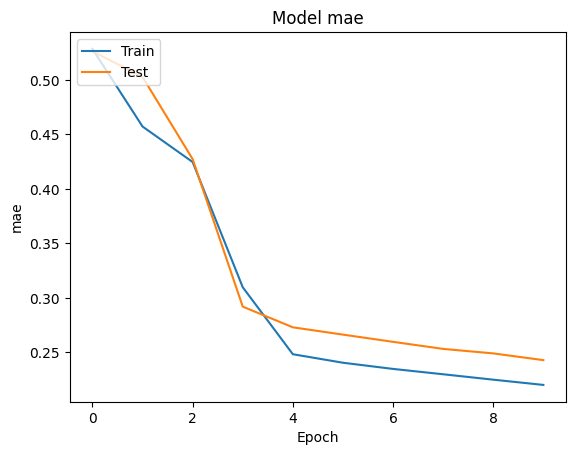

In [ ]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(lstm.history['mae'])
plt.plot(lstm.history['val_mae'])
plt.title('Model mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

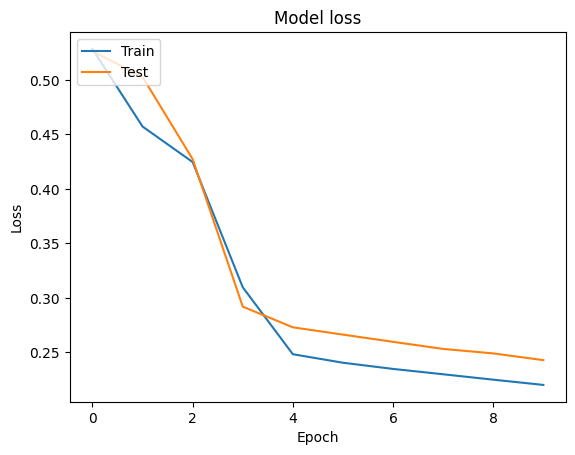

In [ ]:
# 7 훈련 과정 시각화 (손실)
plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#######################
prediction=np.zeros((num_power, end_, num_features))
new_test_x=train_x

for i in range(end_//output_window):
    start_=i*output_window
    next_=model.predict(new_test_x[ : , -input_window:, :])
    new_test_x = tf.concat([new_test_x, next_], axis=1)
    print(new_test_x.shape)
    prediction[:, start_: start_ + output_window, :]= next_

1/1 [==============================] - 0s 432ms/step
(10, 10728, 1)
1/1 [==============================] - 0s 172ms/step
(10, 10752, 1)
1/1 [==============================] - 0s 147ms/step
(10, 10776, 1)
1/1 [==============================] - 0s 158ms/step
(10, 10800, 1)
1/1 [==============================] - 0s 145ms/step
(10, 10824, 1)
1/1 [==============================] - 0s 158ms/step
(10, 10848, 1)
1/1 [==============================] - 0s 180ms/step
(10, 10872, 1)


In [ ]:
prediction

array([[[0.69940282],
        [0.69708072],
        [0.69436881],
        ...,
        [0.67978641],
        [0.67178012],
        [0.66718557]],

       [[0.69609511],
        [0.69382053],
        [0.69106697],
        ...,
        [0.68027707],
        [0.67222947],
        [0.66757619]],

       [[0.69584277],
        [0.69364074],
        [0.69099899],
        ...,
        [0.67980403],
        [0.67179377],
        [0.66718868]],

       ...,

       [[0.72071911],
        [0.71536124],
        [0.71040869],
        ...,
        [0.68273658],
        [0.67456484],
        [0.66980249]],

       [[0.72721804],
        [0.72173976],
        [0.71656748],
        ...,
        [0.68353453],
        [0.67531903],
        [0.67050265]],

       [[0.71401036],
        [0.70907983],
        [0.70441324],
        ...,
        [0.68272697],
        [0.67454262],
        [0.66975785]]])

In [ ]:
submission = pd.read_csv("")

In [ ]:
submission['answer']=prediction.reshape([-1,1])
submission